# Rainfall prediction EDA

Dataset: https://www.kaggle.com/datasets/poojag718/rainfall-timeseries-data/data

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# dataset

df = pd.read_csv(r"C:\Users\kvjai\ML PROJECTS\Rainfall prediction - ARIMA\data\Rainfall_data.csv") 

print(df.head())
print(df.shape)

   Year  Month  Day  Precipitation
0  2000      1    1           0.00
1  2000      2    1           0.11
2  2000      3    1           0.01
3  2000      4    1           0.02
4  2000      5    1         271.14
(252, 4)


In [18]:
# combine date columns to form single date format
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

print(df.head())
print(df.shape)

   Year  Month  Day  Precipitation       Date
0  2000      1    1           0.00 2000-01-01
1  2000      2    1           0.11 2000-02-01
2  2000      3    1           0.01 2000-03-01
3  2000      4    1           0.02 2000-04-01
4  2000      5    1         271.14 2000-05-01
(252, 5)


In [21]:
print(df.describe())

print("\n\nMissing values: ")
print(df.isnull().sum())

              Year       Month    Day  Precipitation  \
count   252.000000  252.000000  252.0     252.000000   
mean   2010.000000    6.500000    1.0     206.798929   
min    2000.000000    1.000000    1.0       0.000000   
25%    2005.000000    3.750000    1.0       0.402500   
50%    2010.000000    6.500000    1.0      11.495000   
75%    2015.000000    9.250000    1.0     353.200000   
max    2020.000000   12.000000    1.0    1307.430000   
std       6.067351    3.458922    0.0     318.093091   

                                Date  
count                            252  
mean   2010-06-16 14:17:08.571428608  
min              2000-01-01 00:00:00  
25%              2005-03-24 06:00:00  
50%              2010-06-16 00:00:00  
75%              2015-09-08 12:00:00  
max              2020-12-01 00:00:00  
std                              NaN  


Missing values: 
Year             0
Month            0
Day              0
Precipitation    0
Date             0
dtype: int64


# Time series of rainfall

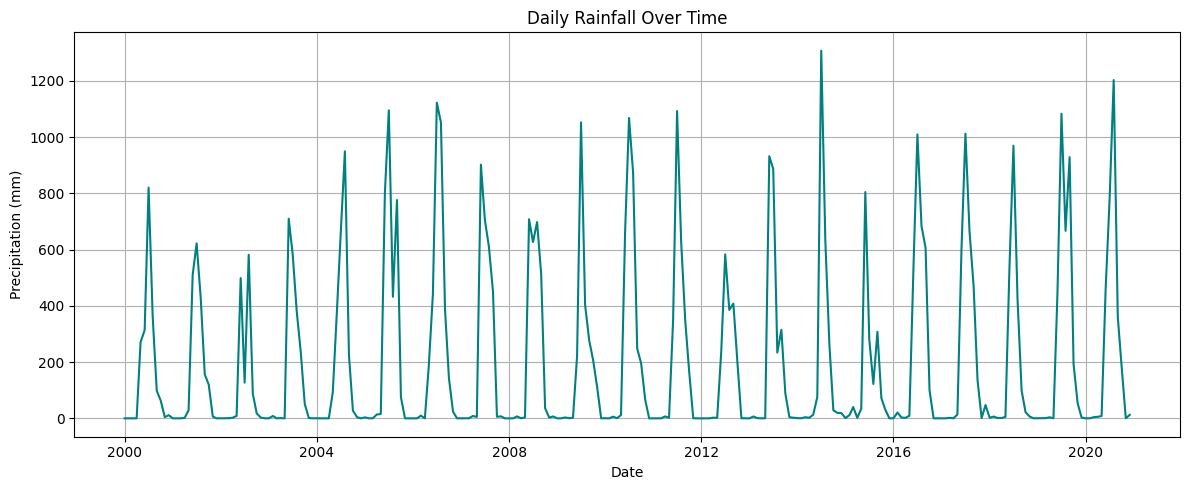

In [22]:
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Precipitation'], color='teal')
plt.title('Daily Rainfall Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Monthly average rainfall

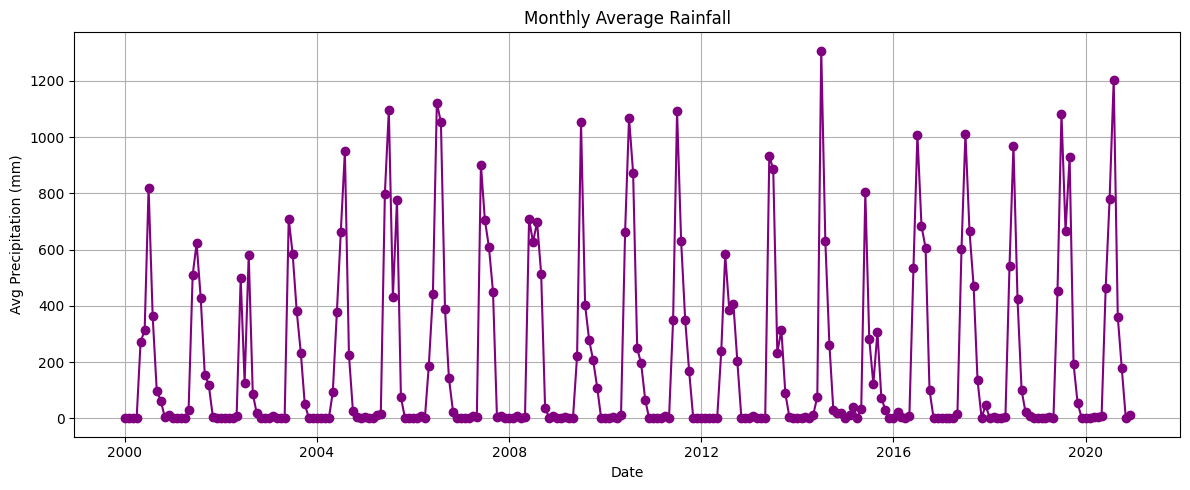

In [25]:
# monthly average
monthly_avg = df.groupby(['Year', 'Month'])['Precipitation'].mean().reset_index()

plt.figure(figsize=(12, 5))
plt.plot(pd.to_datetime(monthly_avg[['Year', 'Month']].assign(Day=1)), monthly_avg['Precipitation'], marker='o', linestyle='-', color='purple')
plt.title('Monthly Average Rainfall')
plt.xlabel('Date')
plt.ylabel('Avg Precipitation (mm)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Yearly total rainfall

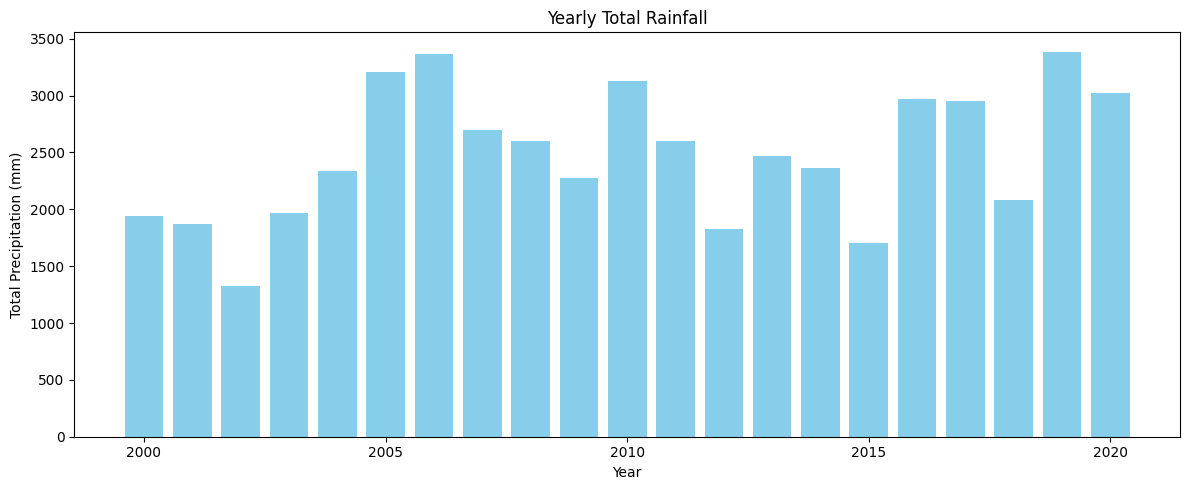

In [26]:
yearly_total = df.groupby('Year')['Precipitation'].sum().reset_index()

plt.figure(figsize=(12, 5))
plt.bar(yearly_total['Year'], yearly_total['Precipitation'], color='skyblue')
plt.title('Yearly Total Rainfall')
plt.xlabel('Year')
plt.ylabel('Total Precipitation (mm)')
plt.tight_layout()
plt.show()

# Rainfall distribution

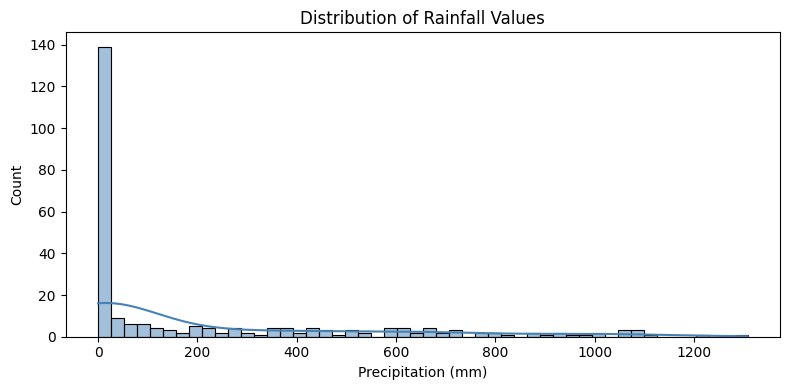

In [27]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Precipitation'], bins=50, kde=True, color='steelblue')
plt.title('Distribution of Rainfall Values')
plt.xlabel('Precipitation (mm)')
plt.tight_layout()
plt.show()

# Monthly boxplot

C:\Users\kvjai\AppData\Local\Temp\ipykernel_21204\3695031289.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='Precipitation', data=df, palette='coolwarm')


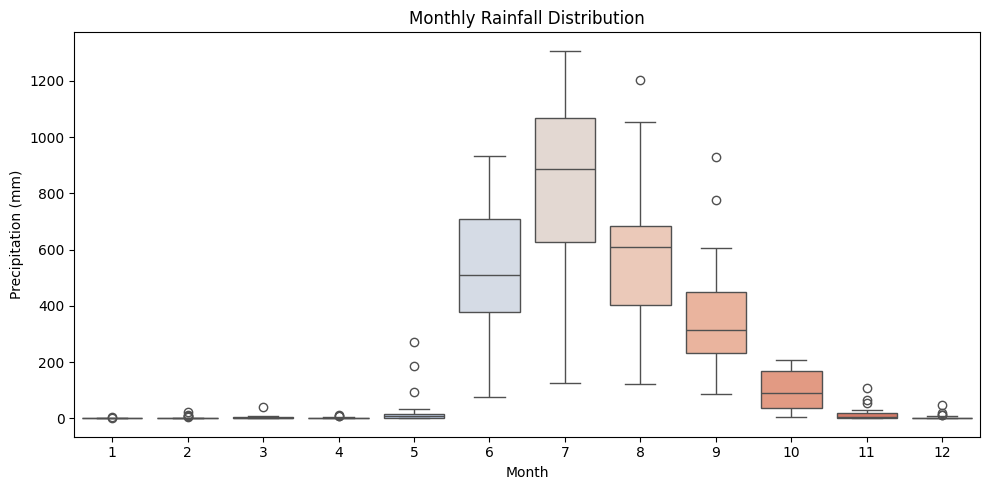

In [28]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Month', y='Precipitation', data=df, palette='coolwarm')
plt.title('Monthly Rainfall Distribution')
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')
plt.tight_layout()
plt.show()

# Heatmap

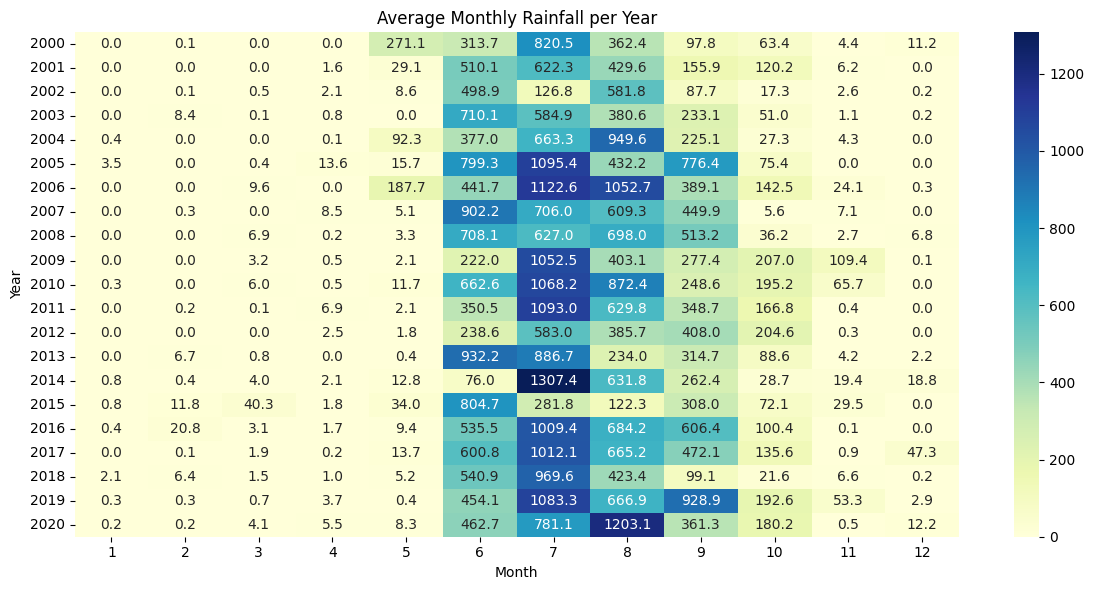

In [30]:
monthly_heatmap = df.groupby(['Year', 'Month'])['Precipitation'].mean().reset_index()
heatmap_pivot = monthly_heatmap.pivot(index='Year', columns='Month', values='Precipitation')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_pivot, cmap='YlGnBu', annot=True, fmt=".1f")
plt.title('Average Monthly Rainfall per Year')
plt.tight_layout()
plt.show()